In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns

In [2]:
nba = pd.read_csv('/kaggle/input/fivethirtyeight-nba-elo-dataset/nbaallelo.csv')

In [3]:
nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [4]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [5]:
nba_2014.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
121054,60528,201310290IND,NBA,1,2014,10/29/2013,1,0,ORL,Magic,...,22.266760,IND,Pacers,97,1583.5721,1585.2700,A,L,0.106039,NaN
121055,60528,201310290IND,NBA,0,2014,10/29/2013,1,0,IND,Pacers,...,49.365368,ORL,Magic,87,1313.2317,1311.5338,H,W,0.893961,NaN
121056,60529,201310290LAL,NBA,0,2014,10/29/2013,1,0,LAL,Lakers,...,42.866776,LAC,Clippers,103,1586.5884,1575.4142,H,W,0.535102,NaN
121057,60529,201310290LAL,NBA,1,2014,10/29/2013,1,0,LAC,Clippers,...,48.369659,LAL,Lakers,116,1511.0200,1522.1942,A,L,0.464898,NaN
121058,60530,201310290MIA,NBA,1,2014,10/29/2013,1,0,CHI,Bulls,...,42.281761,MIA,Heat,107,1691.8896,1695.1932,A,L,0.172841,NaN


In [6]:
knicks_pts_10 = nba_2010[nba_2010['fran_id'] == 'Knicks']['pts']
warriors_pts_10 = nba_2010[nba_2010['fran_id'] == 'Warriors']['pts']

In [7]:
diff_means_2010 = warriors_pts_10.mean() - knicks_pts_10.mean()
print(diff_means_2010)

6.6951219512195195


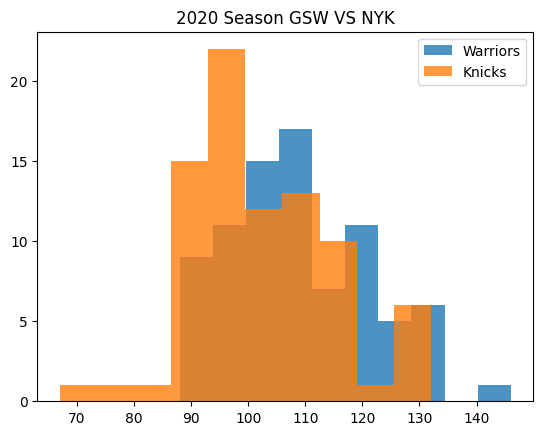

<Figure size 640x480 with 0 Axes>

In [8]:
plt.hist(warriors_pts_10, alpha = 0.8, label = 'Warriors')
plt.hist(knicks_pts_10, alpha = 0.8, label = 'Knicks')
plt.legend()
plt.title("2020 Season GSW VS NYK")
plt.show()
plt.clf()

In [9]:
my_nba_teams = nba_2010[nba_2010['fran_id'].isin(['Warriors', 'Knicks', 'Spurs', 'Timberwolves', 'Lakers'])]

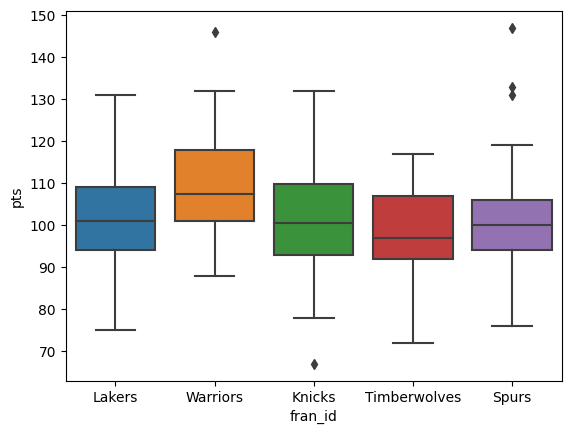

In [10]:
sns.boxplot(data = my_nba_teams, x = 'fran_id', y = 'pts')
plt.show()

In [11]:
loc_results_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(loc_results_freq)

game_location    A    H
game_result            
L              786  526
W              526  786


In [12]:
print(f"The teams win {(786/(526 + 786))*100:.2f}% of all their games at home")

The teams win 59.91% of all their games at home
